# Name-Aniket Bhavar
# roll no-321

# Naive Bayes:

Naive Bayes algorithm is a supervised learing algorithm, which is based on Bayes therorem and used for solving classification problems. It is based on the principle of the Bayes Algorithm.


## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset 

In [2]:
data = pd.read_csv("spam.csv")

## Data Exploration & Preparation

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


## Removing Null values

In [5]:
data.count()

Category    5572
Message     5572
dtype: int64

In [6]:
data.dropna()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.count()

Category    5572
Message     5572
dtype: int64

## Cleaning the data

In [8]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Removing Stopwords from the messages

In [10]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    sentance = []
    for w in words:
        if w not in stop_words:
            sentance.append(w)
    return " ".join(sentance)

In [11]:
data['Message'] = data['Message'].apply(remove_stopwords)
data.head()

,Category,Message
0,ham,"go jurong point , crazy .. available bugis n g..."
1,ham,ok lar ... joking wif u oni ...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor ... u c already say ...
4,ham,"nah n't think goes usf , lives around though"


## Cleaning the SMS messages

In [12]:
def clean_text(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    table = str.maketrans('', '', string.punctuation)
    stripped = []
    for w in words:
        stripped.append(w.translate(table))
    sentance = [word for word in stripped if word.isalpha()]
    return " ".join(sentance)

In [13]:
data['Message'] = data['Message'].apply(clean_text)
data.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts may...
3,ham,u dun say early hor u c already say
4,ham,nah nt think goes usf lives around though


## Visualizing the dataset

## Count plot for the number of spams and hams

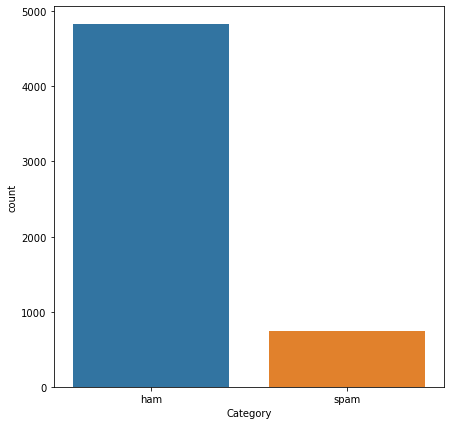

In [14]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x=data['Category'])

## Seperating Spam and Ham SMS

In [15]:
data_spam = data[data['Category']=='spam']
data_spam.head()

,Category,Message
2,spam,free entry wkly comp win fa cup final tkts may...
5,spam,freemsg hey darling s week s word back d like ...
8,spam,winner valued network customer selected receiv...
9,spam,mobile months u r entitled update latest colou...
11,spam,six chances win cash pounds txt send cost tsan...


In [16]:
data_ham = data[data['Category'] == 'ham']
data_ham.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
3,ham,u dun say early hor u c already say
4,ham,nah nt think goes usf lives around though
6,ham,even brother like speak treat like aids patent


In [17]:
data_spam['Total_Words'] = data_spam['Message'].apply(lambda x:len(str(x).split()))
data_ham['Total_Words'] = data_ham['Message'].apply(lambda x:len(str(x).split()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22764\3294165520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spam['Total_Words'] = data_spam['Message'].apply(lambda x:len(str(x).split()))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22764\3294165520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ham['Total_Words'] = data_ham['Message'].apply(lambda x:len(str(x).split()))


In [18]:
data_spam['Total_Words'].describe()

count    747.000000
mean      13.208835
std        3.956774
min        0.000000
25%       11.000000
50%       13.000000
75%       16.000000
max       24.000000
Name: Total_Words, dtype: float64

In [19]:
data_ham['Total_Words'].describe()

count    4825.000000
mean        8.301969
std         6.530910
min         0.000000
25%         4.000000
50%         6.000000
75%        11.000000
max        80.000000
Name: Total_Words, dtype: float64

## Splitting the dataset into training and testing dataset

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = data.iloc[:,-1].values
y = data.iloc[:,:-1].values

In [22]:
X

array(['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
       'ok lar joking wif u oni',
       'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate c s apply s',
       ..., 'pity mood suggestions',
       'guy bitching acted like d interested buying something else next week gave us free',
       'rofl true name'], dtype=object)

In [23]:
y

array([['ham'],
       ['ham'],
       ['spam'],
       ...,
       ['ham'],
       ['ham'],
       ['ham']], dtype=object)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the model using Sklearn Library

### Importing libraries 

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

### Vectorizing the input features

In [26]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)
training_matrix = vectorizer.transform(X_train)

In [27]:
vectorizer.vocabulary_

{'good': 2384,
 'movie': 3764,
 'ok': 4052,
 'leave': 3245,
 'hourish': 2704,
 'wereare': 6546,
 'free': 2177,
 'give': 2344,
 'otherwise': 4137,
 'nalla': 3828,
 'adi': 69,
 'entey': 1798,
 'nattil': 3846,
 'kittum': 3147,
 'emigrated': 1765,
 'something': 5431,
 'maybe': 3564,
 'bit': 593,
 'hopeful': 2680,
 'got': 2402,
 'home': 2657,
 'babe': 433,
 'still': 5611,
 'awake': 417,
 'kay': 3093,
 'since': 5296,
 'already': 178,
 'workin': 6671,
 'get': 2319,
 'job': 3021,
 'said': 5003,
 'matter': 3554,
 'mind': 3650,
 'saying': 5051,
 'oh': 4047,
 'yeah': 6792,
 'diet': 1511,
 'flew': 2080,
 'window': 6603,
 'sorry': 5457,
 'things': 5953,
 'may': 3562,
 'pub': 4603,
 'later': 3219,
 'ill': 2800,
 'call': 820,
 'evening': 1846,
 'ideas': 2779,
 'dear': 1395,
 'reache': 4710,
 'room': 4946,
 'looks': 3383,
 'scrumptious': 5079,
 'daddy': 1348,
 'wants': 6471,
 'eat': 1709,
 'night': 3920,
 'long': 3375,
 'badrith': 445,
 'chennai': 979,
 'surely': 5744,
 'pick': 4333,
 'us': 6314,
 'co

In [28]:
training_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Fitting the training dataset into Naive bayes Classifer

In [29]:
classifier = MultinomialNB()
targets = [y[0] for y in y_train]
classifier.fit(training_matrix, targets)

MultinomialNB()

## Vectorizing the testing dataset

In [30]:
testing_matrix = vectorizer.transform(X_test)
predicted = classifier.predict(testing_matrix)
predicted

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## Evaluating Model Performance

In [31]:
from sklearn import metrics

In [32]:
array = metrics.confusion_matrix(y_test, predicted)

<AxesSubplot:>

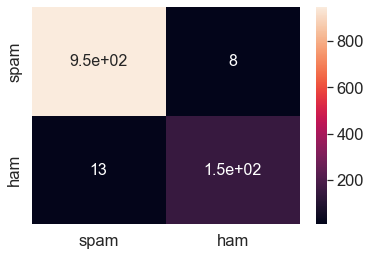

In [33]:
df_result = pd.DataFrame(array, ["spam", "ham"], ["spam", "ham"])
sns.set(font_scale=1.5)
sns.heatmap(df_result, annot = True, annot_kws = {"size": 16})

In [34]:
print(metrics.classification_report(y_test, predicted, target_names = ["spam", "ham"]))

              precision    recall  f1-score   support

        spam       0.99      0.99      0.99       955
         ham       0.95      0.92      0.93       160

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Training the Naive Bayes Model without using Library

### Creating Frequency table used in Naive Bayes

In [35]:
vocabulary = set({})
for message in X_train:
    words = message.split()
    for word in words:
        vocabulary.add(word)
vocabulary = list(vocabulary)

vocab_dict = {}
index=0
for word in vocabulary:
    vocab_dict[word]=index
    index+=1

In [36]:
frequency_table = np.zeros((len(X_train),len(vocabulary)))
index=0
for sentance in X_train:
    words = list(sentance.split())
    for word in words:
        frequency_table[index][vocab_dict[word]]+=1
    index+=1
frequency_table

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Calculating Useful Parameters

In [37]:
total_words = len(vocabulary)
total_words_spam = 0
total_words_ham = 0
index=0
for sentance in X_train:
    if str(y_train[index][0])=="spam":
        total_words_spam+=len(list(sentance.split()))
    else:
        total_words_ham+=len(list(sentance.split()))
    index+=1
print("TOTAL UNIQUE WORDS: " + str(total_words))
print("WORDS IN SPAM: " + str(total_words_spam))
print("WORDS IN HAM: " + str(total_words_ham))

TOTAL UNIQUE WORDS: 6886
WORDS IN SPAM: 7766
WORDS IN HAM: 32007


In [38]:
spams = 0
hams = 0
for sms_type in y_train:
    if sms_type == "spam":
        spams+=1
    else:
        hams+=1
probability_spam = spams/len(X_train)
probability_ham = hams/len(X_train)
alpha = 1
print("PROBABILITY OF SPAM: " + str(probability_spam))
print("PROBABILITY OF HAM: " + str(probability_ham))
print("ALPHA: " + str(alpha))

PROBABILITY OF SPAM: 0.13170293919676912
PROBABILITY OF HAM: 0.8682970608032309
ALPHA: 1
